# CS4320 Introduction to Machine Learning

## A Template for the Course Project Submssion

Note: This template is optional. You can design your Jupyter Notebook structure based on your competition and preference. However, we expect you practice as many machine learning skills you learned in this course as possible.

**Please type your group name here:**

In [2]:
GroupName = "KJM"
assert GroupName != "", 'Please enter your name in the above quotation marks, thanks!'
KaggleCompetitionLink = "https://www.kaggle.com/competitions/playground-series-s4e8"
assert KaggleCompetitionLink != "", 'Please enter your name in the above quotation marks, thanks!'

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Submit the predictions to Kaggle](#13)
14. [Your takeaway from the course](#14)

## Submission instructions <a name="si"></a>
<hr>

- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Upload the .ipynb file to Canvas.
- **Submit the screenshot of your Kaggle submission ranking and score** 
- Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
- Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
- Make sure that the plots and output are rendered properly in your submitted file. 
- Please keep your notebook clean and delete any throwaway code.

## Introduction <a name="in"></a>

A few notes and tips when you work on this project: 

#### Tips
1. The project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 

The problem we are solving is a binary classificaiton task. The goal is to create a model that can accurately predict whether a mushroom is edible (e) or poisonous (p) based on its physical characteristics.

![Mushroom Example](header.png)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, matthews_corrcoef

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

**Your tasks:**

1. Split the data into train and test portions.

In [4]:
mushroom_traindf = pd.read_csv("train.csv")
mushroom_testdf = pd.read_csv("test.csv")

# Subsample the training data
mushroom_traindf = mushroom_traindf.sample(frac=0.1, random_state=42)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 

In [5]:
mushroom_traindf.count()

id                      311694
class                   311694
cap-diameter            311694
cap-shape               311690
cap-surface             244437
cap-color               311693
does-bruise-or-bleed    311693
gill-attachment         259178
gill-spacing            185636
gill-color              311687
stem-height             311694
stem-width              311694
stem-root                36069
stem-surface            113645
stem-color              311692
veil-type                16011
veil-color               37678
has-ring                311693
ring-type               298879
spore-print-color        26584
habitat                 311691
season                  311694
dtype: int64

In [6]:
mushroom_traindf.dtypes

id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

class: binary\
cap-diameter: numeric\
cap-shape: categorical\
cap-surface: categorical\
cap-color: categorical\
does-bruise-or-bleed: binary\
gill-attachment: categorical\
gill-spacing: categorical\
gill-color: categorical\
stem-height: numeric\
stem-width: numeric\
stem-root: categorical\
stem-surface: categorical\
stem-color: categorical\
veil-type: categorical\
veil-color: categorical\
has-ring: binary\
ring-type: categorical\
spore-print-color: categorical\
habitat: categorical\
season: categorical

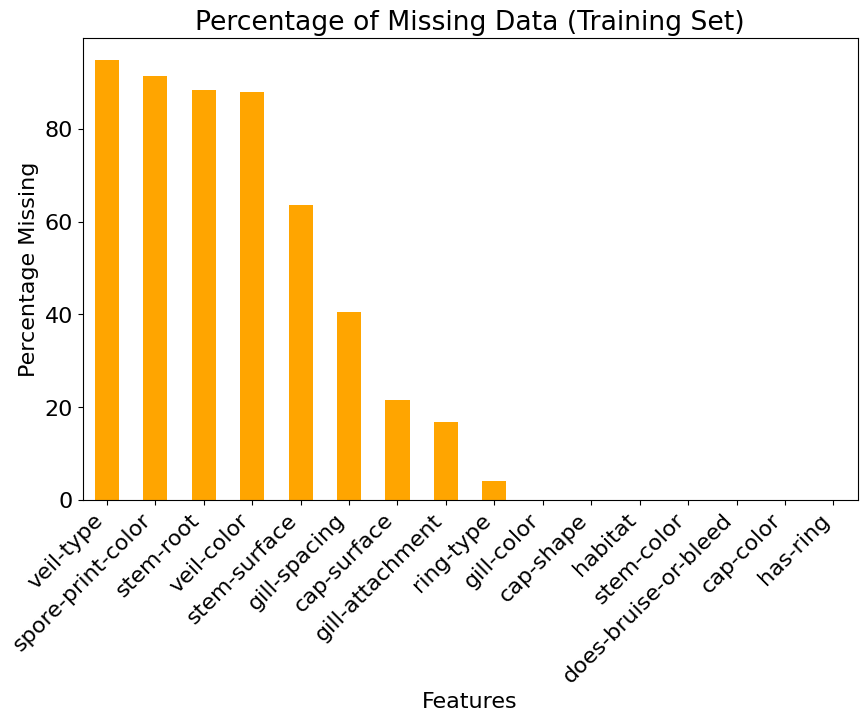

In [7]:
missing_percentage_train = mushroom_traindf.isnull().mean() * 100
missing_percentage_train = missing_percentage_train[missing_percentage_train > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_percentage_train.plot(kind='bar', color='orange')
plt.title('Percentage of Missing Data (Training Set)')
plt.xlabel('Features')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45, ha='right')
plt.show()

missing_percentage_train = mushroom_traindf.isnull().mean() * 100

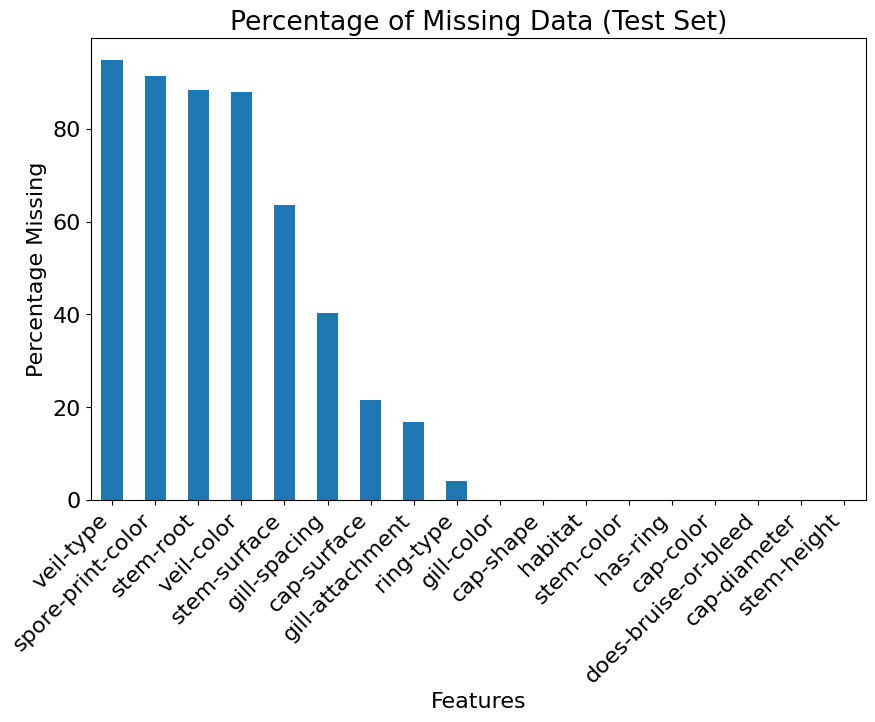

In [8]:
missing_percentage_test = mushroom_testdf.isnull().mean() * 100
missing_percentage_test = missing_percentage_test[missing_percentage_test > 0].sort_values(ascending=False)

# Plot the missing percentages for the test set
plt.figure(figsize=(10, 6))
missing_percentage_test.plot(kind='bar')
plt.title('Percentage of Missing Data (Test Set)')
plt.xlabel('Features')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45, ha='right')
plt.show()
missing_percentage_test = mushroom_testdf.isnull().mean() * 100


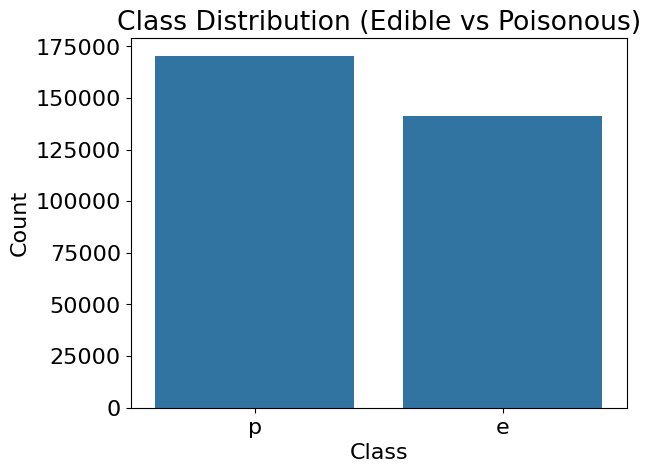

In [9]:
sns.countplot(data=mushroom_traindf, x='class')
plt.title('Class Distribution (Edible vs Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Data exploration showed us that several features had a lot of missing data. It also shows that much of the dataset is categorical. 

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set. You may have to go back and forth between feature engineering and preprocessing. Briefly explain why you come up with these new features.



<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [10]:
# Remove any data where over 50% was missing
train_cleaned = mushroom_traindf.loc[:, missing_percentage_train < 50]
test_cleaned = mushroom_testdf.loc[:, missing_percentage_test < 50]

train_cleaned.head(), test_cleaned.head()

(              id class  cap-diameter cap-shape cap-surface cap-color  \
 1356763  1356763     p          7.82         s           t         r   
 2369311  2369311     p          3.20         o         NaN         g   
 1146527  1146527     e          9.36         f         NaN         n   
 889383    889383     p          6.52         s           d         e   
 416134    416134     p          3.13         b           t         n   
 
         does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
 1356763                    t               d          NaN          g   
 2369311                    f               f            f          f   
 1146527                    t             NaN          NaN          w   
 889383                     t               d            c          w   
 416134                     f             NaN          NaN          n   
 
          stem-height  stem-width stem-color has-ring ring-type habitat season  
 1356763         4.49       13.30      

In [11]:
# Imputation and Encoding with remaining columns
columns_to_use = ['id','cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
                  'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
                  'stem-height', 'stem-width', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season']

train_operations = train_cleaned[columns_to_use].copy()
test_operations = test_cleaned[columns_to_use].copy()

binary_cols = ['does-bruise-or-bleed', 'has-ring']
numeric_cols = ['cap-diameter', 'stem-height', 'stem-width']
categorical_cols = ['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment', 'gill-spacing', 
                    'gill-color', 'stem-color', 'ring-type', 'habitat', 'season']

# Imputing values
numeric_imputer = SimpleImputer(strategy='median')
train_operations.loc[:, numeric_cols] = numeric_imputer.fit_transform(train_operations[numeric_cols])
test_operations.loc[:, numeric_cols] = numeric_imputer.transform(test_operations[numeric_cols])

# Imputing categorical columns with 'most_frequent'
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_operations.loc[:, categorical_cols] = categorical_imputer.fit_transform(train_operations[categorical_cols])
test_operations.loc[:, categorical_cols] = categorical_imputer.transform(test_operations[categorical_cols])

train_operations['does-bruise-or-bleed'] = train_operations['does-bruise-or-bleed'].map({'f': 0, 't': 1}).astype('float64')
train_operations['has-ring'] = train_operations['has-ring'].map({'f': 0, 't': 1}).astype('float64')

test_operations['does-bruise-or-bleed'] = test_operations['does-bruise-or-bleed'].map({'f': 0, 't': 1}).astype('float64')
test_operations['has-ring'] = test_operations['has-ring'].map({'f': 0, 't': 1}).astype('float64')

In [12]:

train_operations.head(), test_operations.head()

(              id  cap-diameter cap-shape cap-surface cap-color  \
 1356763  1356763          7.82         s           t         r   
 2369311  2369311          3.20         o           t         g   
 1146527  1146527          9.36         f           t         n   
 889383    889383          6.52         s           d         e   
 416134    416134          3.13         b           t         n   
 
          does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
 1356763                   1.0               d            c          g   
 2369311                   0.0               f            f          f   
 1146527                   1.0               a            c          w   
 889383                    1.0               d            c          w   
 416134                    0.0               a            c          n   
 
          stem-height  stem-width stem-color  has-ring ring-type habitat season  
 1356763         4.49       13.30          g       0.0         f    

In [13]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

train_encoded = one_hot_encoder.fit_transform(train_operations[categorical_cols])

test_encoded = one_hot_encoder.transform(test_operations[categorical_cols])

train_encoded_df = pd.DataFrame(train_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))
test_encoded_df = pd.DataFrame(test_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

train_encoded_df.index = train_operations.index
test_encoded_df.index = test_operations.index

train_operations = pd.concat([train_operations.drop(categorical_cols, axis=1), train_encoded_df], axis=1)
test_operations = pd.concat([test_operations.drop(categorical_cols, axis=1), test_encoded_df], axis=1)
train_operations = train_operations.merge(
    train_cleaned[['id', 'class']], on='id', how='left'
)

X_train = train_operations.drop(columns=['id', 'class'], errors='ignore')
y_train = train_operations['class']

X_test = test_operations.drop(columns=['id'], errors='ignore')

imputer = SimpleImputer(strategy='most_frequent')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Check the result
print(train_operations.head())
train_operations.head(), test_operations.head()

        id  cap-diameter  does-bruise-or-bleed  stem-height  stem-width  \
0  1356763          7.82                   1.0         4.49       13.30   
1  2369311          3.20                   0.0         3.76       17.16   
2  1146527          9.36                   1.0        10.12       22.83   
3   889383          6.52                   1.0         5.82        8.03   
4   416134          3.13                   0.0         9.92        6.00   

   has-ring  cap-shape_19.06  cap-shape_4.22  cap-shape_5.15  cap-shape_6.44  \
0       0.0              0.0             0.0             0.0             0.0   
1       0.0              0.0             0.0             0.0             0.0   
2       1.0              0.0             0.0             0.0             0.0   
3       0.0              0.0             0.0             0.0             0.0   
4       1.0              0.0             0.0             0.0             0.0   

   ...  habitat_s  habitat_t  habitat_u  habitat_w  habitat_y  seaso

(        id  cap-diameter  does-bruise-or-bleed  stem-height  stem-width  \
 0  1356763          7.82                   1.0         4.49       13.30   
 1  2369311          3.20                   0.0         3.76       17.16   
 2  1146527          9.36                   1.0        10.12       22.83   
 3   889383          6.52                   1.0         5.82        8.03   
 4   416134          3.13                   0.0         9.92        6.00   
 
    has-ring  cap-shape_19.06  cap-shape_4.22  cap-shape_5.15  cap-shape_6.44  \
 0       0.0              0.0             0.0             0.0             0.0   
 1       0.0              0.0             0.0             0.0             0.0   
 2       1.0              0.0             0.0             0.0             0.0   
 3       0.0              0.0             0.0             0.0             0.0   
 4       1.0              0.0             0.0             0.0             0.0   
 
    ...  habitat_s  habitat_t  habitat_u  habitat_w  h

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [14]:
dummy = DummyClassifier(strategy="most_frequent")

dummy.fit(X_train, y_train)

test_predictions = dummy.predict(X_test)

In [15]:
submission = pd.DataFrame(
    {
        'id' : mushroom_testdf['id'],
        'class' : test_predictions
    }
)

submission.to_csv('submission.csv', index=False)

submission.head()

,id,class
0,3116945,p
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,p


In [16]:
train_predictions = dummy.predict(X_train)
accuracy = accuracy_score(y_train, train_predictions)
mcc = matthews_corrcoef(y_train, train_predictions)

print("Dummy Classifier Training Accuracy:", accuracy)
print("Dummy Classifier Matthew's Correlation Coefficient:", mcc)
print("\nClassification Report:\n",classification_report(y_train, train_predictions, zero_division=0))

Dummy Classifier Training Accuracy: 0.5468664780201095
Dummy Classifier Matthew's Correlation Coefficient: 0.0

Classification Report:
               precision    recall  f1-score   support

           e       0.00      0.00      0.00    141239
           p       0.55      1.00      0.71    170455

    accuracy                           0.55    311694
   macro avg       0.27      0.50      0.35    311694
weighted avg       0.30      0.55      0.39    311694



<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [4000,5000,6000]
}


# Initialize
logistic_model = LogisticRegression(random_state=42, solver='saga', max_iter=5000)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=logistic_model,
    param_distributions=param_distributions,
    n_iter=3,
    cv=3,
    scoring='accuracy',
    random_state=42,
)

logistic_model.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

best_logistic_model = random_search.best_estimator_

# Cross-validate
cv_results = cross_validate(best_logistic_model, X_train, y_train, cv=5)
print("Logistic Regression Cross-Validation Accuracy Mean:", cv_results['test_score'].mean())
print("Logistic Regression Cross-Validation Std Dev:", cv_results['test_score'].std())

# Predictions on the test set
test_predictions = best_logistic_model.predict(X_test)

# Create the submission dataframe
submission_logistic_tuned = pd.DataFrame(
    {
        'id': mushroom_testdf['id'],
        'class': test_predictions
    }
)

submission_logistic_tuned.to_csv('submission_logistic_tuned.csv', index=False)
print(submission_logistic_tuned.head())

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>

**Your tasks:**
1. Try other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model?

### Decision Tree Model

In [23]:
# First real submission using a decision tree
X_train = train_operations.drop('class', axis=1, errors='ignore')
y_train = train_operations['class']

dt_train = DecisionTreeClassifier()
dt_train.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
dt_test_predictions = dt_train.predict(test_operations)
submission1 = pd.DataFrame(
    {
        'id' : mushroom_testdf['id'],
        'class' : dt_test_predictions
    }
)

submission1.to_csv('submission1.csv', index=False)

submission1.head()

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e


### Gradient Boosting Model

In [26]:
# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

gbt = GradientBoostingClassifier()

# Fit the model on the training data
gbt.fit(X_train_imputed, y_train)

# Impute missing values in test_operations
test_operations_imputed = imputer.transform(test_operations)

# Predict on the test data
gbt_test_predictions = gbt.predict(test_operations_imputed)
# gbt_test_predictions = gbt.predict(test_operations)

# Create a submission dataframe
submission_gbt = pd.DataFrame(
    {
        'id': mushroom_testdf['id'],
        'class': gbt_test_predictions
    }
)

# Save the submission to a CSV file
submission_gbt.to_csv('submission_gbt.csv', index=False)

# Display the first few rows of the submission
submission_gbt.head()

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>

**Your tasks:**

Make some attempts to select relevant features. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it. 

In [ ]:
# Your code here

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

### Linear Regression Hyperparameter Optimization

In [ ]:
param_distributions = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [4000,5000,6000]
}


# Initialize
logistic_model = LogisticRegression(random_state=42, solver='saga', max_iter=5000)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=logistic_model,
    param_distributions=param_distributions,
    n_iter=3,
    cv=3,
    scoring='accuracy',
    random_state=42,
)

logistic_model.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)

best_logistic_model = random_search.best_estimator_

# Cross-validate
cv_results = cross_validate(best_logistic_model, X_train, y_train, cv=5)
print("Logistic Regression Cross-Validation Accuracy Mean:", cv_results['test_score'].mean())
print("Logistic Regression Cross-Validation Std Dev:", cv_results['test_score'].std())

# Predictions on the test set
test_predictions = best_logistic_model.predict(X_test)

# Create the submission dataframe
submission_logistic_tuned = pd.DataFrame(
    {
        'id': mushroom_testdf['id'],
        'class': test_predictions
    }
)

submission_logistic_tuned.to_csv('submission_logistic_tuned.csv', index=False)
print(submission_logistic_tuned.head())

### Gradient Boosting Hyperparameter Optimization

In [ ]:
# Define hyperparameters for Randomized Search
param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],  
    'subsample': [0.6, 0.8, 1.0]
}

gbt = GradientBoostingClassifier()

# Random search 1 time
random_search = RandomizedSearchCV(
    gbt,
    param_distributions=param_distributions,
    n_iter=3,
    scoring='accuracy',
    cv=3,
    random_state=42
)

# Fit model on training data
random_search.fit(X_train_imputed, y_train)

# Best parameters and estimator
print("Best Parameters:", random_search.best_params_)
best_gbt = random_search.best_estimator_

# cross-validation
cv_scores = cross_val_score(best_gbt, X_train_imputed, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())

# Predict test data
gbt_test_predictions = best_gbt.predict(test_operations_imputed)

# Create submission dataframe
submission_gbt = pd.DataFrame(
    {
        'id': mushroom_testdf['id'],
        'class': gbt_test_predictions
    }
)

# Save submission to CSV file
submission_gbt.to_csv('submission_gbt_tune.csv', index=False)

# Display first few rows
print(submission_gbt.head())

### Decision Tree Hyperparameter Optimization

In [ ]:
dt = DecisionTreeClassifier()

param_distributions = {
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 3, 5, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

random_search = RandomizedSearchCV(
    dt,
    param_distributions=param_distributions,
    n_iter=3,
    scoring='accuracy',
    cv=3
)

random_search.fit(X_train, y_train)

# Best parameters and estimator
print("Best Parameters:", random_search.best_params_)
best_gbt = random_search.best_estimator_

# cross-validation
cv_scores = cross_val_score(best_gbt, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_scores.mean())

dt_test_predictions = dt.predict(test_operations)
submission_dt = pd.DataFrame(
    {
        'id' : mushroom_testdf['id'],
        'class' : dt_test_predictions
    }
)

submission_dt.to_csv('submission_dt_tune.csv', index=False)

submission_dt.head()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="11"></a>
<hr>

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

In [ ]:
# Your code here

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

**Your tasks:**

1. Try your best performing model on the test data (from train test split) and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

In [ ]:
# Your code here

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Submit the predictions to Kaggle <a name="13"></a>
<hr>

**Your tasks:**

Retrain the best model on the whole training dataset and upload the predicted output on the test set to Kaggle. Report your final test score.

In [ ]:
# Your code here

_Place the Kaggle screenshot here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="14"></a>
<hr>

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

<!-- END QUESTION -->

<br><br>